In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

# Notas

check 1 equivale a que el prompt retorno una busqueda cercana <br>
check 0 equivale a que el prompt retorno una busqueda alejada <br>
interesting 1 equivale a prompts que me parecieron interesantes para mi <br>
fellings 1 equivale a prompts que mezclaron palabras - me gusta - o parecidas <br>
mix 1 equivale a prompts que buscaron dos catgorias ejemplo el primero pidio ciencia ficcion y novela clasica que son dos categorias <br>

Inicialmente tenemos del prompt una categoria que asociaron los que la escribieron (type) que luego pasara a llamarse categorias_apriori, luego tenemos la categoria del libro que retorna el modelo (categories) que luego pasara a llamarse categorias_aposteriori. <br>

In [2]:
pro = pd.read_csv('prompts_salida.csv')
pro = pro.fillna(0)
pro.insert(1, 'true', 1)
pro = pro.loc[:,['id','true','language','type','lengh_words','categories', 'check','interesting', 'fellings', 'mix']]
pro.head()

,id,true,language,type,lengh_words,categories,check,interesting,fellings,mix
0,1,1,es,Science fiction,11,Young Adult Fiction,1,0.0,0.0,1.0
1,1,1,es,Science fiction,11,Fiction,1,0.0,0.0,1.0
2,1,1,es,Science fiction,11,Juvenile Fiction,1,0.0,0.0,1.0
3,1,1,es,Science fiction,11,Juvenile Fiction,1,0.0,0.0,1.0
4,1,1,es,Science fiction,11,"Fantasy fiction, American",1,0.0,0.0,1.0


In [3]:
# Cuantas busquedas dieron libros cercanos al prompt
pro['check'].value_counts()

check
1    298
0     52
Name: count, dtype: int64

In [4]:
# Busquedas interesantes
pro['interesting'].value_counts()

interesting
0.0    291
1.0     59
Name: count, dtype: int64

In [5]:
# Cuantas busquedas con palabras me gusta o parecidas
pro['fellings'].value_counts()

fellings
0.0    330
1.0     20
Name: count, dtype: int64

In [6]:
# Cuantas busquedas suguieren dos categorias
pro['mix'].value_counts()

mix
0.0    285
1.0     65
Name: count, dtype: int64

<Axes: xlabel='lengh_words', ylabel='Density'>

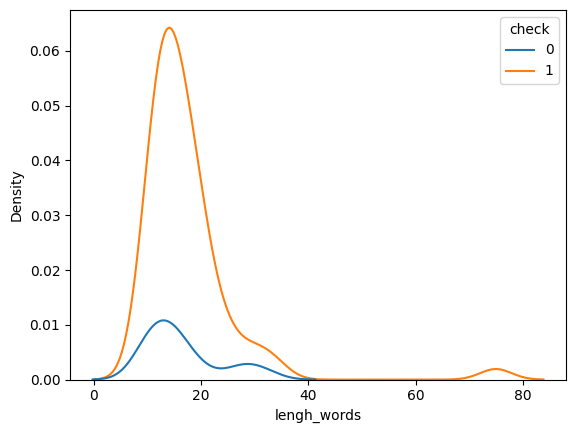

In [7]:
# Numero de palabras por check
sns.kdeplot(data=pro, x="lengh_words", hue="check")

In [8]:
tabla_contingencia = pd.crosstab(pro['type'], pro['check'], normalize='index').reset_index()
tabla_contingencia = tabla_contingencia.sort_values(by=[0], ascending=False)
tabla_contingencia.rename(columns={'type':'categorias_apriori', 0:'Porcentaje mal clasificado'}, inplace=True)
tabla_contingencia = tabla_contingencia.loc[:,['categorias_apriori', 'Porcentaje mal clasificado']]
tabla_contingencia.head()

check,categorias_apriori,Porcentaje mal clasificado
11,Literature,0.600000
10,History,0.440000
14,Novel,0.300000
18,Romance,0.266667
9,Graphic novel,0.200000


Entre más largo el prompt mejor sin embargo que sea corto de palabras o tokens no significa que falle, solo aumenta la probabilidad de falla, sin embargo es mas relativo a la categoria apriori.

# En esta parte se busco asociar las categorias

En esta seccion se buscara ver la relacion entre las categorias apriori y posteriori de las salidas que fueron check 1 <br>
Solo se contara con las relaciones mayores a 0.2 (elegido a ojo pero se puede cambiar) <br>
Se omiten las categorias_apriori = categorias_aposteriori ya que se buscan ver cambios en la categorizacion. <br>
<br>
Se encontraron 82 posibles cambios de categorias <br>

In [9]:
df = pro.copy()
df = df[df['check'] == 1]

# Calcular la tabla de contingencia
tabla_contingencia = pd.crosstab(df['type'], df['categories'], normalize='index')
relaciones_filtradas = tabla_contingencia[
    (tabla_contingencia >= 0.2)     # Porcentaje
]

columnas_derretir = relaciones_filtradas.columns

relaciones_filtradas = relaciones_filtradas.reset_index()
relaciones_filtradas.rename(columns={'type':'categorias_apriori'}, inplace=True)

# aplicar el método melt() para transformar el DataFrame en formato largo
df_relaciones = relaciones_filtradas.melt(id_vars=['categorias_apriori'], 
                                          value_vars=columnas_derretir,
                                          var_name='categorias_aposteriori', 
                                          value_name='relacion')
df_relaciones = df_relaciones.dropna()
df_relaciones = df_relaciones[(df_relaciones['categorias_apriori'] != df_relaciones['categorias_aposteriori'])] # Si se quieren ver todas las relaciones
df_relaciones = df_relaciones.sort_values(by=['relacion'], ascending=False)
df_relaciones.head(20)

,categorias_apriori,categorias_aposteriori,relacion
561,Graphic novel,Fiction,0.875000
570,Romance,Fiction,0.818182
557,Classic literature,Fiction,0.800000
564,Mystery,Fiction,0.782609
563,Literature,Fiction,0.750000
213,Economy,Business & Economics,0.750000
210,Business,Business & Economics,0.700000
566,Novel,Fiction,0.571429
572,Science fiction,Fiction,0.464286
1240,Self -help,Self-Help,0.450000


In [10]:
# Posibles cambios
df_relaciones.shape[0]

30

In [11]:
# df_relaciones.to_csv('df_relaciones.csv', encoding = 'utf-8-sig', index = False)

In [12]:
print('ok_')

ok_
